**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Part I. Import and Inspect Data

## 1.1 import packages

In [128]:
import seaborn as sns
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10) 
plt.rcParams["lines.linewidth"] = 2 
plt.style.use("ggplot")

In [129]:
from statsmodels.tsa.seasonal import seasonal_decompose #Describes the time data
from statsmodels.tsa.stattools import adfuller #Check if data is stationary
from statsmodels.graphics.tsaplots import plot_acf #Compute lag for ARIMA
from statsmodels.graphics.tsaplots import plot_pacf #Compute partial lag for ARIMA
from statsmodels.tsa.arima_model import ARIMA #Predictions and Forecasting


from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error


In [157]:
random.seed(42)

## 1.2 import train and test data for regression

In [158]:
R_train = pd.read_csv(
    "https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-prediction-Haowen/main/data/Processed_data/Regression_Train.csv")
R_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-prediction-Haowen/main/data/Processed_data/Regression_Test.csv")

In [159]:
R_train["Date"] = pd.to_datetime(R_train.Date, dayfirst=True)
R_train = R_train.set_index("Date", inplace=False)
R_test["Date"] = pd.to_datetime(R_test.Date, dayfirst=True)
R_test = R_test.set_index("Date", inplace=False)


In [160]:
R_train.isna().sum()

Open          0
6-month-ma    1
dtype: int64

In [161]:
R_train=R_train.dropna()

In [162]:
R_test.isna().sum()

Open          0
6-month-ma    0
dtype: int64

In [163]:
R_train.head()

,Open,6-month-ma
Date,,
2015-08-08,2.793760,2.831620
2015-08-09,0.706136,2.812690
2015-08-10,0.713989,2.110505
2015-08-11,0.708087,1.761376
2015-08-12,1.058750,1.550718


In [164]:
R_test.head()

,Open,6-month-ma
Date,,
2019-09-27,166.651703,197.638288
2019-09-28,174.680832,189.097341
2019-09-29,174.612747,182.296387
2019-09-30,170.461349,176.112976
2019-10-01,180.209122,170.882853


# Part II. Machine Learning Regression

## 2.1 important global packages

In [165]:
from sklearn.metrics import r2_score

## 2.2 Define the Train and Test (X, y)

In [166]:
R_train.head()

,Open,6-month-ma
Date,,
2015-08-08,2.793760,2.831620
2015-08-09,0.706136,2.812690
2015-08-10,0.713989,2.110505
2015-08-11,0.708087,1.761376
2015-08-12,1.058750,1.550718


In [167]:
X_train = pd.DataFrame(R_train['6-month-ma'])
y_train = pd.DataFrame(R_train['Open'])

In [168]:
R_test.head()

,Open,6-month-ma
Date,,
2019-09-27,166.651703,197.638288
2019-09-28,174.680832,189.097341
2019-09-29,174.612747,182.296387
2019-09-30,170.461349,176.112976
2019-10-01,180.209122,170.882853


In [169]:
X_test = pd.DataFrame(R_test['6-month-ma'])
y_test = pd.DataFrame(R_test['Open'])

In [170]:
y_test.head()

,Open
Date,
2019-09-27,166.651703
2019-09-28,174.680832
2019-09-29,174.612747
2019-09-30,170.461349
2019-10-01,180.209122


## 2.3 Linear Regression

In [171]:
from sklearn import linear_model

In [172]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [173]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: 0.9846494668740317


In [174]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,198.123914
1,189.636997
2,182.879065
3,176.734770
4,171.537733
...,...
750,3550.658016
751,3598.792580
752,3666.715515
753,3716.606597


C:\Users\Haowen\AppData\Local\Temp\ipykernel_21624\3084031857.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


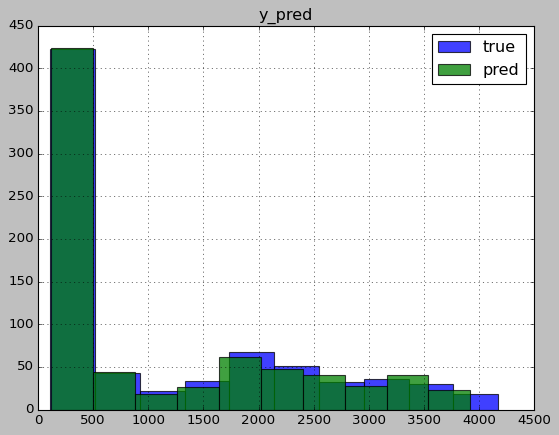

In [175]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


In [176]:
y_plot = y_test.copy()
y_plot["y_pred"] = y_pred.values
y_plot.head()

,Open,y_pred
Date,,
2019-09-27,166.651703,198.123914
2019-09-28,174.680832,189.636997
2019-09-29,174.612747,182.879065
2019-09-30,170.461349,176.734770
2019-10-01,180.209122,171.537733


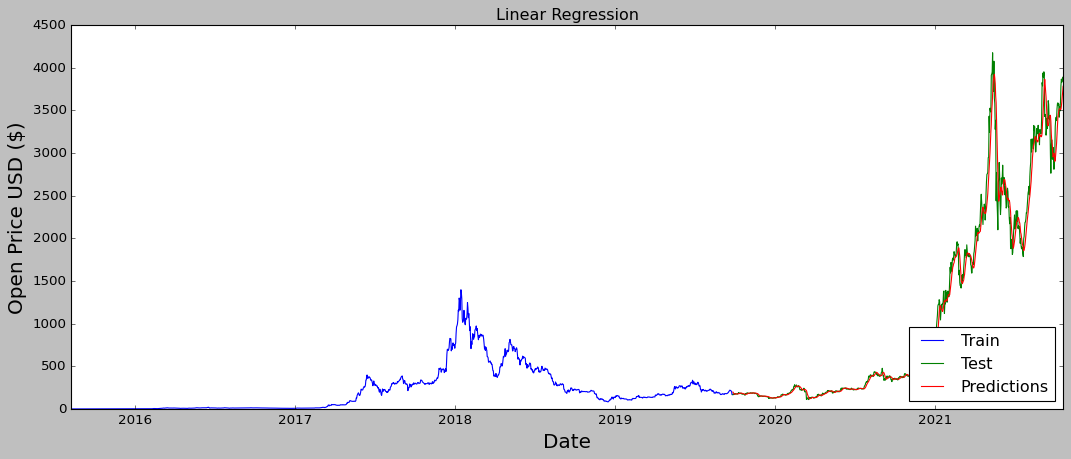

In [177]:
plt.figure(figsize=(16, 6))
plt.title('Linear Regression')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.plot(R_train['Open'])
plt.plot(y_plot[['Open', 'y_pred']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

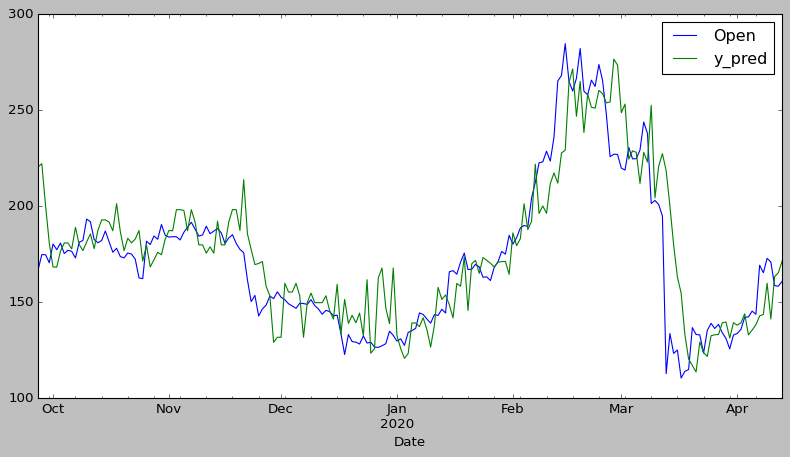

In [202]:
y_plot[['Open', 'y_pred']].iloc[:200].plot(
    figsize=(12, 6)).autoscale(axis='x', tight=True)

## 2.3 Random Forest Regression

In [203]:
from sklearn.ensemble import RandomForestRegressor

In [204]:
mdl = RandomForestRegressor().fit(X_train, y_train)

C:\Users\Haowen\AppData\Local\Temp\ipykernel_21624\3800963566.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [205]:
# calculate R2
from sklearn.metrics import r2_score

In [206]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

R2 Score: 0.39212736833232564


In [207]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,219.102261
1,220.027421
2,204.756515
3,180.774048
4,165.868812
...,...
750,1202.540995
751,1202.540995
752,1202.540995
753,1202.540995


C:\Users\Haowen\AppData\Local\Temp\ipykernel_21624\3084031857.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


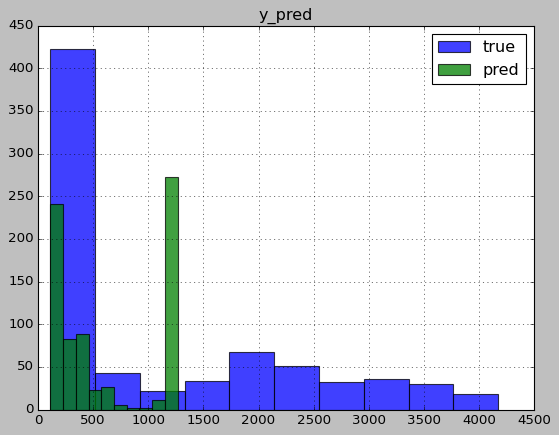

In [208]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


In [209]:
y_plot = y_test.copy()
y_plot["y_pred"] = y_pred.values
y_plot.head()

,Open,y_pred
Date,,
2019-09-27,166.651703,219.102261
2019-09-28,174.680832,220.027421
2019-09-29,174.612747,204.756515
2019-09-30,170.461349,180.774048
2019-10-01,180.209122,165.868812


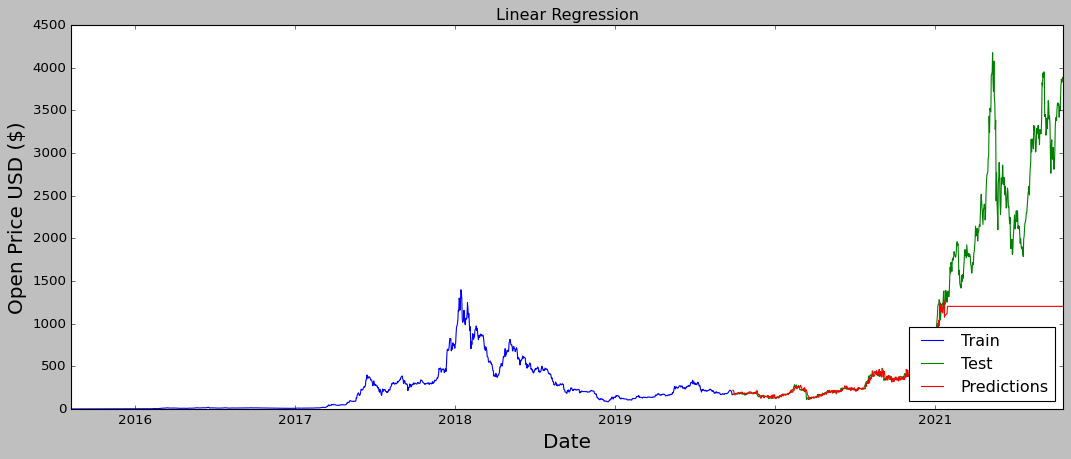

In [210]:
plt.figure(figsize=(16, 6))
plt.title('Linear Regression')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.plot(R_train['Open'])
plt.plot(y_plot[['Open', 'y_pred']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()


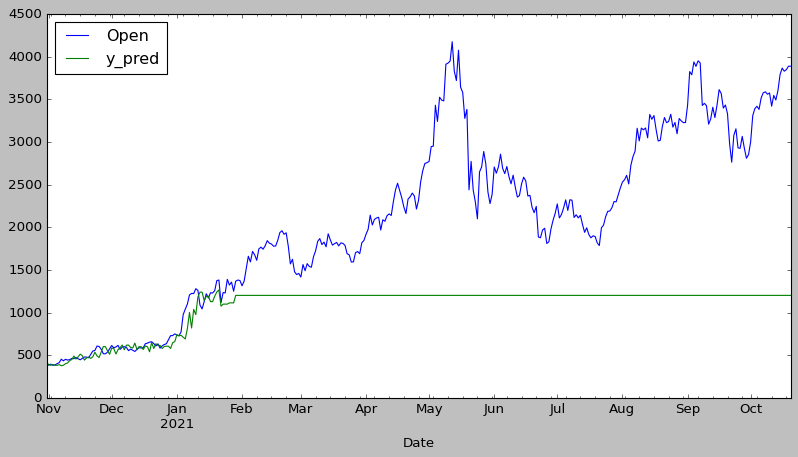

In [213]:
y_plot[['Open', 'y_pred']].iloc[400:].plot(
    figsize=(12, 6)).autoscale(axis='x', tight=True)
